In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
# Input training data
df = pd.read_csv('C:\\Users\\09350\\Documents\\SpringBoard\\capstone2\\data\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [409]:
#peek at the data
df.head()

#Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [410]:
#look at the values for target variable
df['Churn'].value_counts()
print('Roughly a quarter of the customers in this data set have churned!')

Roughly a quarter of the customers in this data set have churned!


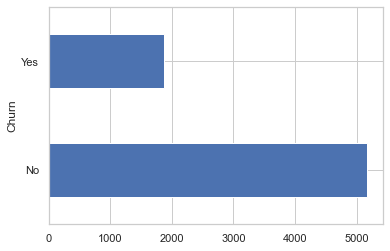

In [411]:
df_plt = df.groupby(['Churn']).size().plot.barh(x="Churn",y="Counts")

In [412]:
#different types for data in this dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [413]:
# converting churn to numerical variable for analyzing
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1
df['Churn'] = df['Churn'].astype(int)

In [414]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,NaN
top,1010-DIAUQ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,NaN
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,NaN
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,0.265370
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,0.441561
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,1.000000


In [415]:
print('We see that Tenure ranges from 0 (new customer) to 6 years, Monthly charges range from $18 to $118, etc')

We see that Tenure ranges from 0 (new customer) to 6 years, Monthly charges range from $18 to $118, etc


In [416]:
#Total charges is obect in the data types converting to number
totalCharges = df.columns.get_loc("TotalCharges")
new_col = pd.to_numeric(df.iloc[:, totalCharges], errors='coerce')
df.iloc[:, totalCharges] = pd.Series(new_col)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


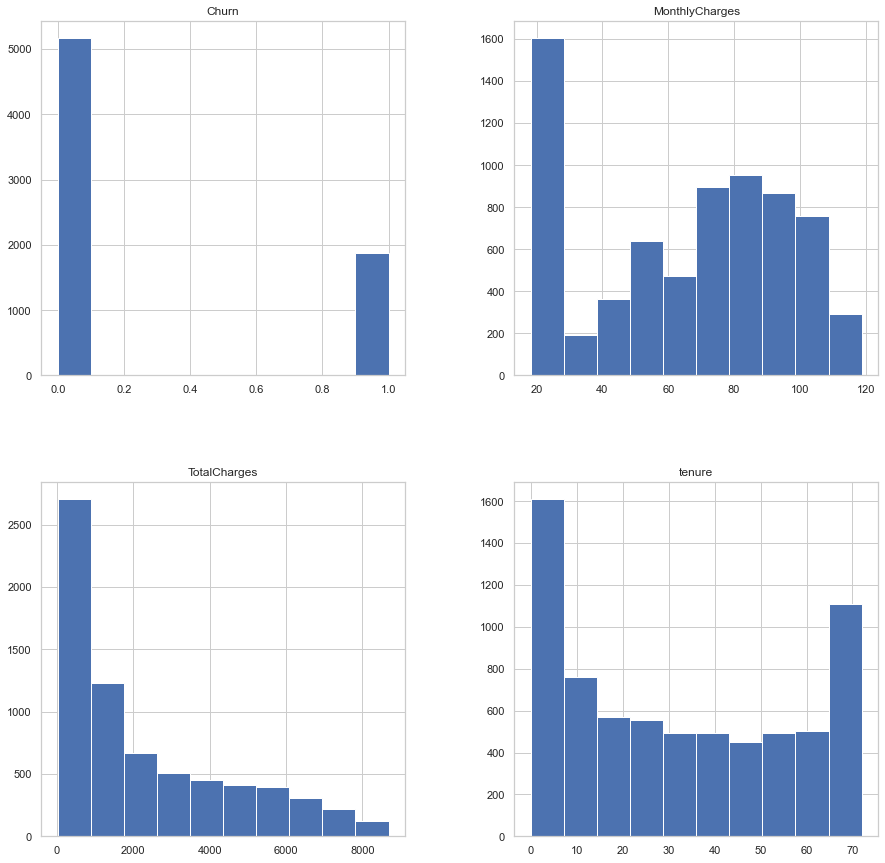

In [418]:
#Visual summary of the variables in the dataframe
pd.DataFrame.hist(df[['MonthlyCharges','TotalCharges','tenure','Churn']], figsize= [15,15]);

In [419]:
print(df.isnull().values.any())
df.isnull().sum()

# Looks like Total charges has missing values

True


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

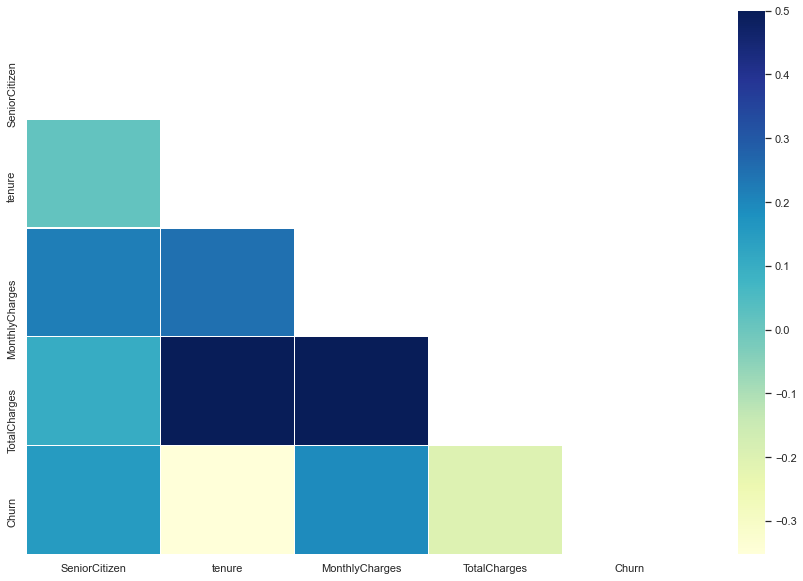

In [420]:
corr = df.corr()
#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [421]:
import pandas_profiling

In [422]:
# dealing with missing values by imputing

# Handle missing values for nan_column (TotalCharges)
from sklearn.impute import SimpleImputer

# Find the column number for TotalCharges (starting at 0).
total_charges_idx = df.columns.get_loc("TotalCharges")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df.iloc[:, total_charges_idx] = imputer.fit_transform(df.iloc[:, total_charges_idx].values.reshape(-1, 1))
df.iloc[:, total_charges_idx] = pd.Series(df.iloc[:, total_charges_idx])

In [423]:
# Validate that we have addressed any NaN values
print(df.isnull().values.any())
df.isnull().sum()

False


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [424]:
#Lets looks a a data profiling report using pandas_profiling API
pandas_profiling.ProfileReport(df)

In [425]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Visualization

In [427]:
sns.set()
sns.set_style('whitegrid')
sns.axes_style("whitegrid") 

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

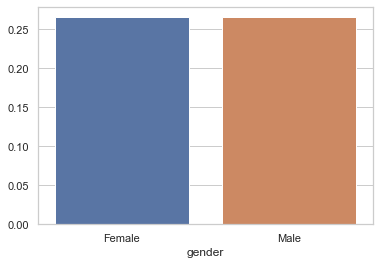

In [428]:
# churn rate by gender
sns.barplot(x="gender",y=df["Churn"].mean(),data=df)

In [429]:
# plotting gender
mean_churn = df[['gender','Churn']].groupby('gender').mean()
print(mean_churn)
print("Female churn is little higher, but not that big difference")

           Churn
gender          
Female  0.269209
Male    0.261603
Female churn is little higher, but not that big difference


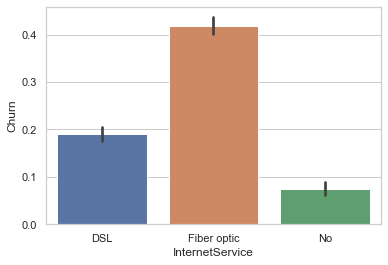

In [430]:
# churn rate by InternetService
sns.barplot(x="InternetService",y=df["Churn"]
            ,data=df)

In [431]:
# plotting Internet Servive type
isp_churn = df[['InternetService','Churn']].groupby('InternetService').mean()
print(isp_churn)
print("Fiber Optic customers are churning at a higher rate")

                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
Fiber Optic customers are churning at a higher rate


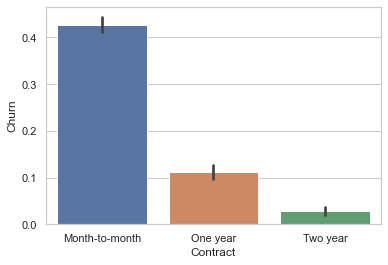

In [432]:
# churn rate by Contract type
sns.barplot(x="Contract",y=df["Churn"]
            ,data=df)

In [433]:
# plotting Internet Servive type
cont_churn = df[['Contract','Churn']].groupby('Contract').mean()
print(cont_churn)
print("Month to Month subscribers are churning at a higher rate")

                   Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319
Month to Month subscribers are churning at a higher rate


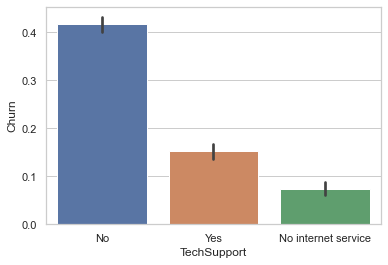

In [434]:
# churn rate by TechSupport
sns.barplot(x="TechSupport",y=df["Churn"]
            ,data=df)

In [435]:
# plotting TechSupport
tech_churn = df[['TechSupport','Churn']].groupby('TechSupport').mean()
print(tech_churn)
print("Customers who did not use  Tech Support are churning at a higher rate")

                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663
Customers who did not use  Tech Support are churning at a higher rate


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

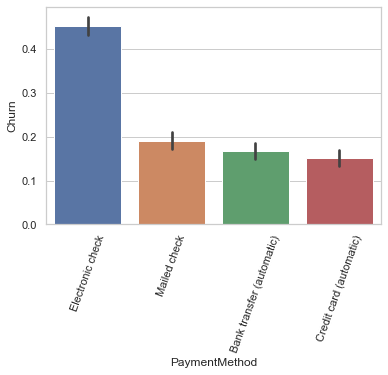

In [436]:

# churn rate by Contract type
sns.barplot(x="PaymentMethod",y=df["Churn"]
            ,data=df)
plt.xticks(rotation=70)

In [437]:

# plotting PaymentMethod
paym_churn = df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()
print(paym_churn)
print("Customers who use checks as payment method are churning at higher rate")

                              Churn
PaymentMethod                      
Bank transfer (automatic)  0.167098
Credit card (automatic)    0.152431
Electronic check           0.452854
Mailed check               0.191067
Customers who use checks as payment method are churning at higher rate


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

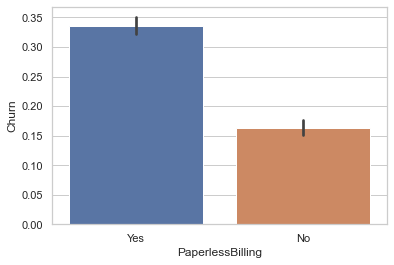

In [438]:
# churn rate by Contract type
sns.barplot(x="PaperlessBilling",y=df["Churn"]
            ,data=df)
plt.xticks(rotation=0)

In [439]:

# plotting PaperlessBilling
ebill_churn = df[['PaperlessBilling','Churn']].groupby('PaperlessBilling').mean()
print(ebill_churn)
print("Customers who are on paperless billing are churning at higher rate")

                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651
Customers who are on paperless billing are churning at higher rate


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

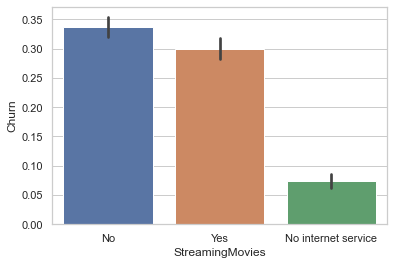

In [440]:
#
# churn rate by StreamingMovies
sns.barplot(x="StreamingMovies",y=df["Churn"]
            ,data=df)
plt.xticks(rotation=0)

In [441]:

# plotting PaperlessBilling
smove_churn = df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()
print(smove_churn)
print("Customers who not steaming movies subscribers are churning at higher rate")

                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
Customers who not steaming movies subscribers are churning at higher rate


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

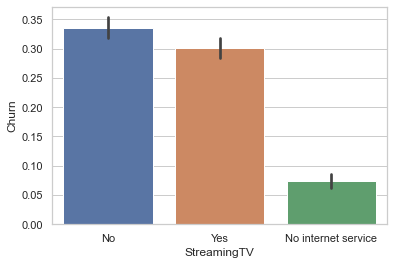

In [442]:
#
# churn rate by StreamingTV
sns.barplot(x="StreamingTV",y=df["Churn"]
            ,data=df)
plt.xticks(rotation=0)

In [443]:

# plotting PaperlessBilling
stv_churn = df[['StreamingTV','Churn']].groupby('StreamingTV').mean()
print(stv_churn)
print("Customers who not steaming tv subscribers are churning at higher rate")

                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
Customers who not steaming tv subscribers are churning at higher rate


In [444]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

It shows that if the customer"s tenure is long then churn rate is low


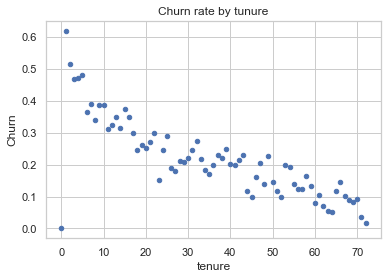

In [445]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df_plot = df.groupby('tenure').Churn.mean().reset_index()
df_plot.plot.scatter(x='tenure',y='Churn')
plt.title('Churn rate by tunure')

print('It shows that if the customer"s tenure is long then churn rate is low')

There seems to be no relation for Churn and MonthlyCharges


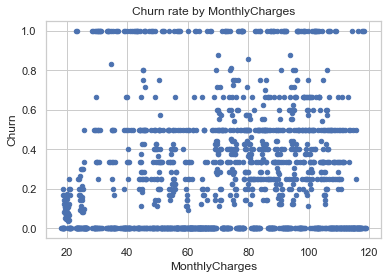

In [446]:
# other variables

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df_plot = df.groupby('MonthlyCharges').Churn.mean().reset_index()
df_plot.plot.scatter(x='MonthlyCharges',y='Churn')
plt.title('Churn rate by MonthlyCharges')

print('There seems to be no relation for Churn and MonthlyCharges')



Monthly Charges seems to be roughly normal distribution


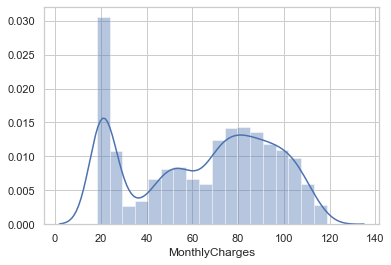

In [447]:
sns.distplot(df['MonthlyCharges'])
print('Monthly Charges seems to be roughly normal distribution')

Tenure Distribution seems to be high at the ends so a portion of the customers have either had lowest and highest tenure periods


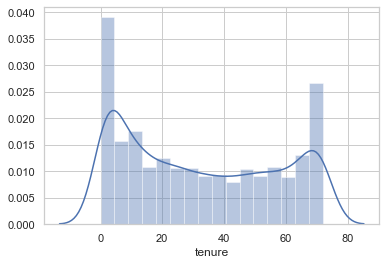

In [448]:
sns.distplot(df['tenure'])
print('Tenure Distribution seems to be high at the ends so a portion of the customers have either had lowest and highest tenure periods')

In [449]:
df_clean_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [450]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)
print('\nAll Categorical Columns: ', categorical_columns)

All Features:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Categorical Features:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Continuous Features:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

All Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [451]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [452]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df.columns:
    if df[column].dtype == object and column != 'customerID':
        if df[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df[column] = le.fit_transform(df[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_clean_data = pd.get_dummies(data = df,columns = dummy_columns)

In [453]:
df_clean_data.head()

# Dropping varibles that are not neeeded and also target variables
X = df_clean_data.drop(['Churn','customerID'], axis=1)

# target variable
y = df_clean_data['Churn']

In [454]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)

In [455]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# # Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion ='gini', max_depth=30, random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.72


In [456]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', min_samples_split = 285)

RF.fit(X_train, y_train)

y_pred_rf = RF.predict(X_test)

f1_rf = metrics.f1_score(y_pred_rf, y_test)

print("F1 Score:"+str(f1_rf))

metrics.classification_report(y_test, y_pred_rf)

print(metrics.classification_report(y_test, y_pred_rf))

importance = zip(RF.feature_importances_, X)

for rank in sorted(importance, key = lambda x: x[0], reverse = True):
    print(rank)
    
print("\n")

F1 Score:0.4937428896473265
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1552
           1       0.68      0.39      0.49       561

    accuracy                           0.79      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.77      0.79      0.77      2113

(0.18471147863836182, 'Contract_Month-to-month')
(0.11442642379126265, 'tenure')
(0.10100493635942966, 'Contract_Two year')
(0.0982382543285208, 'TechSupport_No')
(0.09230013061759944, 'OnlineSecurity_No')
(0.07314729973261153, 'TotalCharges')
(0.061141046340066334, 'InternetService_Fiber optic')
(0.039172250908475134, 'MonthlyCharges')
(0.03239155894357418, 'PaymentMethod_Electronic check')
(0.029721540979643933, 'Contract_One year')
(0.027851253791213167, 'InternetService_DSL')
(0.016477632948434663, 'DeviceProtection_No')
(0.014209744385601443, 'OnlineBackup_No')
(0.013149352740409084, 'OnlineSecurity_Yes')
(0.01244798019772456, 'Stre

In [457]:
import xgboost as xgb
from matplotlib import pyplot

# instansitate xbg classifier
xg_cl = xgb.XGBRFClassifier(objective='binary:logistic', n_estimators=10,seed=123)

# Fit on train
xg_cl.fit(X_train, y_train)

#Predict on Test
y_pred_xgb = xg_cl.predict(X_test)

#Accuracy Scores
accuracy_xgb = float(np.sum(y_pred_xgb==y_test))/y_test.shape[0]

print('accuracy: %f' % (accuracy_xgb))

f1_xgb = metrics.f1_score(y_pred_xgb, y_test)

print("F1 Score:"+str(f1_xgb))

metrics.classification_report(y_test, y_pred_xgb)

print(metrics.classification_report(y_test, y_pred_xgb))

importance = zip(xg_cl.feature_importances_, X)

for rank in sorted(importance, key = lambda x: x[0], reverse = True):
    print(rank)

accuracy: 0.803124
F1 Score:0.5763747454175152
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.50      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

(0.47182062, 'Contract_Month-to-month')
(0.13212639, 'InternetService_Fiber optic')
(0.06621624, 'InternetService_DSL')
(0.048428386, 'tenure')
(0.044380188, 'OnlineSecurity_No')
(0.038071003, 'TechSupport_No')
(0.016612278, 'TotalCharges')
(0.014647642, 'MultipleLines_Yes')
(0.013603278, 'MultipleLines_No phone service')
(0.012875929, 'OnlineBackup_No')
(0.011087111, 'MonthlyCharges')
(0.009676405, 'PhoneService')
(0.009507693, 'StreamingMovies_Yes')
(0.009485692, 'PaymentMethod_Electronic check')
(0.008081857, 'SeniorCitizen')
(0.0080476785, 'Contract_One year')
(0.008031217, 'StreamingMovies_No')
(0.007920006, 'Stre

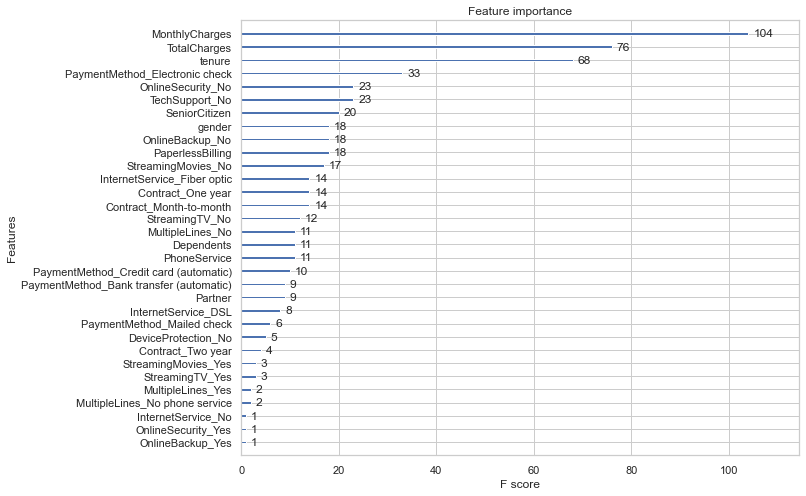

In [458]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xg_cl, ax=ax)

In [466]:
df_clean_data['proba'] = xg_cl.predict_proba(df_clean_data[X_train.columns])[:,1]
y_pred_prob = xg_cl.predict_proba(X_test)[:,1]

In [460]:
df_clean_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,proba
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,1,0,0,0,0,1,0,0.540049
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,1,0,0,0,0,1,0.128942
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,1,0,0,0,0,0,1,0.330419
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,0,0,0,1,0,1,0,0,0,0.130152
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,1,0,0,0,0,1,0,0.667152


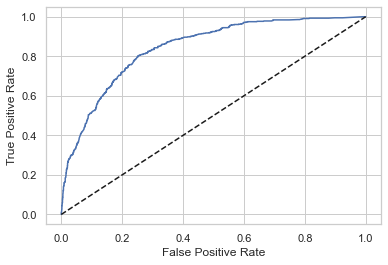

In [468]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.plot([0,1],[0,1],"k--")

plt.show()

In [471]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8427611086608964
